# Visualizing Data with the Spatially Enabled DataFrame

The Spatially Enabled Dataframe has a [`plot()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?arcgis.features.GeoAccessor.from_featureclass#arcgis.features.GeoAccessor.plot) method that uses a syntax and symbology similar to [`matplotlib`](https://matplotlib.org) for visualizing features on a map. With this functionality, you can easily visualize aspects of your data both on a map and on a matplotlib chart using the same symbology!

Some unique characteristics of working with the visualization capabalities on the SDF:
- Uses Pythonic syntax
- Uses the same syntax as visualizing charts on Pandas DataFrames
- Uses symbology familiar to users of matplotlib
- Works on features and attributes simultaneously, eliminating to a great extent the need to iterate over all features (rows)
- Handles reading and writing to multiple formats aiding data conversion

Checkout the [Introduction to Spatially Enabled DataFrame](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/) guide to learn how to create a Spatially Enabled DataFrame.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-Data-with-the-Spatially-Enabled-DataFrame" data-toc-modified-id="Visualizing-Data-with-the-Spatially-Enabled-DataFrame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing Data with the Spatially Enabled DataFrame</a></span><ul class="toc-item"><li><span><a href="#Quickstart" data-toc-modified-id="Quickstart-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Quickstart</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-DataFrame" data-toc-modified-id="Plotting-the-DataFrame-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plotting the DataFrame</a></span></li></ul></li><li><span><a href="#Understanding-renderers" data-toc-modified-id="Understanding-renderers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Understanding renderers</a></span><ul class="toc-item"><li><span><a href="#Supported-renderers" data-toc-modified-id="Supported-renderers-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Supported renderers</a></span></li><li><span><a href="#Visualizing-unique-values" data-toc-modified-id="Visualizing-unique-values-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Visualizing unique values</a></span></li><li><span><a href="#Visualizing-Unique-Values-with-Arcade-Expressions" data-toc-modified-id="Visualizing-Unique-Values-with-Arcade-Expressions-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Visualizing Unique Values with Arcade Expressions</a></span><ul class="toc-item"><li><span><a href="#Obtain-the-Data" data-toc-modified-id="Obtain-the-Data-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Obtain the Data</a></span></li><li><span><a href="#Write-out-the-Arcade-Expressions-and-Stops" data-toc-modified-id="Write-out-the-Arcade-Expressions-and-Stops-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Write out the Arcade Expressions and Stops</a></span></li><li><span><a href="#Visualize-the-Data" data-toc-modified-id="Visualize-the-Data-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>Visualize the Data</a></span></li></ul></li><li><span><a href="#Visualizing-classes-with-different-colors" data-toc-modified-id="Visualizing-classes-with-different-colors-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Visualizing classes with different colors</a></span></li></ul></li><li><span><a href="#Colormaps-and-Colors" data-toc-modified-id="Colormaps-and-Colors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Colormaps and Colors</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Color-Array" data-toc-modified-id="Color-Array-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>Color Array</a></span></li><li><span><a href="#Color-Maps" data-toc-modified-id="Color-Maps-1.3.0.2"><span class="toc-item-num">1.3.0.2&nbsp;&nbsp;</span>Color Maps</a></span></li><li><span><a href="#Color-Map-Helpers" data-toc-modified-id="Color-Map-Helpers-1.3.0.3"><span class="toc-item-num">1.3.0.3&nbsp;&nbsp;</span>Color Map Helpers</a></span></li></ul></li></ul></li><li><span><a href="#Symbology-for-Simple-Renderers" data-toc-modified-id="Symbology-for-Simple-Renderers-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Symbology for Simple Renderers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Getting-the-different-symbol-styles" data-toc-modified-id="Getting-the-different-symbol-styles-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Getting the different symbol styles</a></span></li></ul></li><li><span><a href="#Visualizing-line-features-using-simple-symbols" data-toc-modified-id="Visualizing-line-features-using-simple-symbols-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Visualizing line features using simple symbols</a></span></li><li><span><a href="#Visualizing-area-features-using-different-symbols" data-toc-modified-id="Visualizing-area-features-using-different-symbols-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Visualizing area features using different symbols</a></span></li></ul></li></ul></li></ul></div>

## Quickstart
Let us read a census data on major cities and load that into a `Spatially Enabled DataFrame`

In [1]:
from arcgis import GIS

gis = GIS()
# create an anonymous connection to ArcGIS Online and get a public item
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]

# Specify a SQL query and get a sub-set of the original data as a DataFrame
df = flayer.query(where="AGE_45_54 < 1500").sdf

# Visualize the top 5 records
df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.4,4961,229,3324,1408,"{""x"": -12520053.904151963, ""y"": 5300220.333409..."
4,12,Jerome,city,ID,16,1641320,,6,11403,10890,...,779,210,385,2640,3.44,3985,292,2219,1474,"{""x"": -12747828.64784961, ""y"": 5269214.8197742..."


> Note: If the above cell looks new to you, please checkout the [Introduction to Spatially Enabled DataFrame](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/) guide.

Let us create a map of the United States

In [2]:
m1 = gis.map("United States")
m1

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

In [3]:
m1.zoom = 4
m1.center = [39, -98]

### Plotting the DataFrame
You can quickly visualize the points by calling the `plot()` method off the `DataFrame`'s `spatial` accessor and passing the map you created above.

In [4]:
df.spatial.plot(map_widget=m1)

True

You can customize the symbols, their color, shape, border etc. like you would in a typical matplotlib plot. The rest of this guide talks about such customizations and suggestions to visualize your spatial and non-spatial data.

The code below plots the same set of points on a new map using a common structure used amongst many different Python packages for defining symbology. It is built off of the matplotlib libraries for simple, straightforward plotting. We'll explain some of the parameters below, and the [`plot()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.SpatialDataFrame.plot) API Reference outlines more options.

In [5]:
m2 = GIS().map("United States")
m2

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

In [6]:
m2.center = [39, -98]

In [7]:
from arcgis.map.renderers import SimpleRenderer
from arcgis.map.symbols import (
    SimpleMarkerSymbolEsriSMS,
    SimpleMarkerSymbolStyle,
    SimpleLineSymbolEsriSLS,
    SimpleLineSymbolStyle,
)

renderer = SimpleRenderer(
    symbol=SimpleMarkerSymbolEsriSMS(
        style=SimpleMarkerSymbolStyle.esri_sms_diamond.value,
        size=10,
        outline=SimpleLineSymbolEsriSLS(
            color=[0, 0, 255, 255],
            width=0.7,
            style=SimpleLineSymbolStyle.esri_sls_solid.value,
        ),
        color=[255, 0, 0, 255],
    ),
)

df.spatial.plot(
    map_widget=m2,
    renderer=renderer,
)

True

If this type of plotting is new to you, this is a good time to checkout [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_summary.html) documentation and Pandas dataframe [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) documentation to get an idea.

In [ ]:
gis = GIS()
m3 = gis.map("United States")
m3

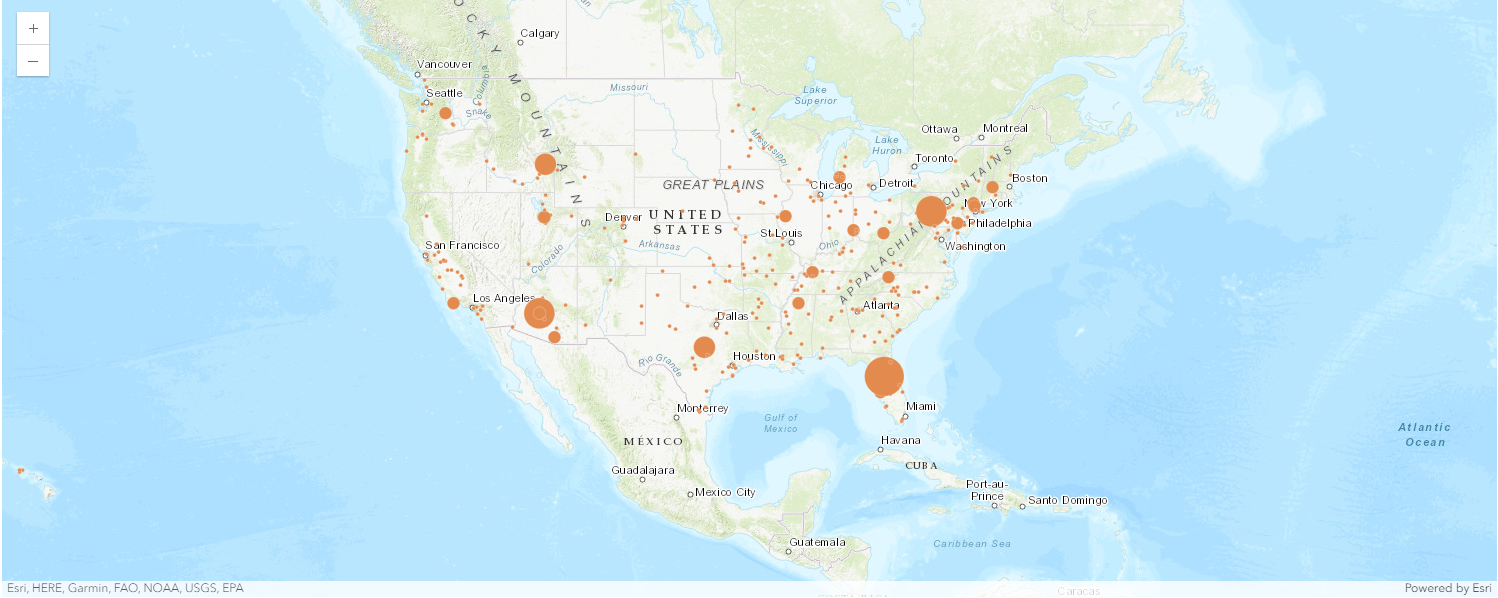

In [14]:
df.spatial.plot(map_widget=m3)

True

In [23]:
renderer_manager = m3.content.renderer(0)
smm = renderer_manager.smart_mapping()
smm.class_breaks_renderer(break_type="size", field="POP2010")

### Visualizing Unique Values with Arcade Expressions

Arcade is an expression language that can be used across the ArcGIS Platform. Whether writing simple scripts to control how features are rendered, or expressions to control label text, Arcade provides a simple scripting syntax to deliver these capabilities.

In the sense of visualization, Arcade expressions are used to create rich and dynamic symbology.  This example will follow the [JavaScript guide](https://developers.arcgis.com/javascript/latest/guide/arcade/index.html#visualization).

#### Obtain the Data

Access the enterprise to gain access to the FeatureLayer information and query it into a Spatially Enabled DataFrame.

In [24]:
item = gis.content.get("8444e275037549c1acab02d2626daaee")
flayer = item.layers[0]
df2 = flayer.query().sdf

In [25]:
fset = flayer.query()

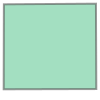

In [26]:
from arcgis.geometry import Geometry

g = Geometry(fset.features[0].geometry)
g.as_shapely

#### Write out the Arcade Expressions and Stops

Arcade expressions require the stops to be manually provided.  In this case, we first create an opacity visual variable based on a percent of dominant parties in registered citizens.

In [30]:
from arcgis.map.renderers import TransparencyInfoVisualVariable

opacity_expression = (
    "var republican = $feature.MP06025a_B;var democrat = $feature.MP06024a_B;"
    "var independent = $feature.MP06026a_B;var parties = [republican, democrat, independent];"
    "var total = Sum(parties);var max = Max(parties);return (max / total) * 100;"
)
opacity_stops = [
    {"value": 33, "transparency": 0.05 * 255, "label": "< 33%"},
    {"value": 44, "transparency": 1.0 * 255, "label": "> 44%"},
]

vv = [
    TransparencyInfoVisualVariable(
        stops=opacity_stops, value_expression=opacity_expression
    )
]

Next we develop another Arcade expression to obtain the majority party in a given county.

In [36]:
from arcgis.map.renderers import UniqueValueRenderer, UniqueValueInfo
from arcgis.map.symbols import SimpleFillSymbolEsriSFS

arcade_expression = (
    "var republican = $feature.MP06025a_B;var democrat = $feature.MP06024a_B;"
    "var independent = $feature.MP06026a_B;var parties = [republican, democrat, independent];"
    "return Decode( Max(parties),republican, 'republican', democrat, 'democrat',independent, "
    "'independent','n/a' );"
)
uv = [
    UniqueValueInfo(
        label="Democrat",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "color": [0, 195, 255, 255],
                "outline": {
                    "type": "esriSLS",
                    "color": [0, 0, 0, 51],
                    "width": 0.5,
                    "style": "esriSLSSolid",
                },
                "style": "esriSFSSolid",
            }
        ),
        value="democrat",
    ),
    UniqueValueInfo(
        label="Republican",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "color": [255, 0, 46, 255],
                "outline": {
                    "type": "esriSLS",
                    "color": [0, 0, 0, 51],
                    "width": 0.5,
                    "style": "esriSLSSolid",
                },
                "style": "esriSFSSolid",
            }
        ),
        value="republican",
    ),
    UniqueValueInfo(
        label="Independent/other party",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "color": [250, 255, 0, 255],
                "outline": {
                    "type": "esriSLS",
                    "color": [0, 0, 0, 51],
                    "width": 0.5,
                    "style": "esriSLSSolid",
                },
                "style": "esriSFSSolid",
            }
        ),
        value="independent",
    ),
]


uv_rend = UniqueValueRenderer(
    unique_value_infos=uv, value_expression=arcade_expression, visual_variables=vv
)

In [37]:
gis = GIS()
m3_ua = gis.map("United States")
m3_ua

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

#### Visualize the Data

Provide the color scheme, and the `arcade_expression` to render the data in a dynamic/rich form.

In [38]:
df2.spatial.plot(map_widget=m3_ua, renderer=uv_rend)

True

### Visualizing classes with different colors
Often, you may want to classify the numerical values in your data into groups and visualize them on a map. You can accomplish this with a **class break renderer** which splits your data into specific number of groups and uses **color** to differentiate each group. You can choose the algorithm that performs the class splits or go with the defualt.

Let us visualize the same major cities point dataset using its `POPULATION` column.

In [39]:
df[["ST", "NAME", "POPULATION"]].head()

,ST,NAME,POPULATION
0,ID,Ammon,15181
1,ID,Blackfoot,11946
2,ID,Burley,10727
3,ID,Chubbuck,14655
4,ID,Jerome,11403


In [ ]:
m4 = gis.map("USA")
m4

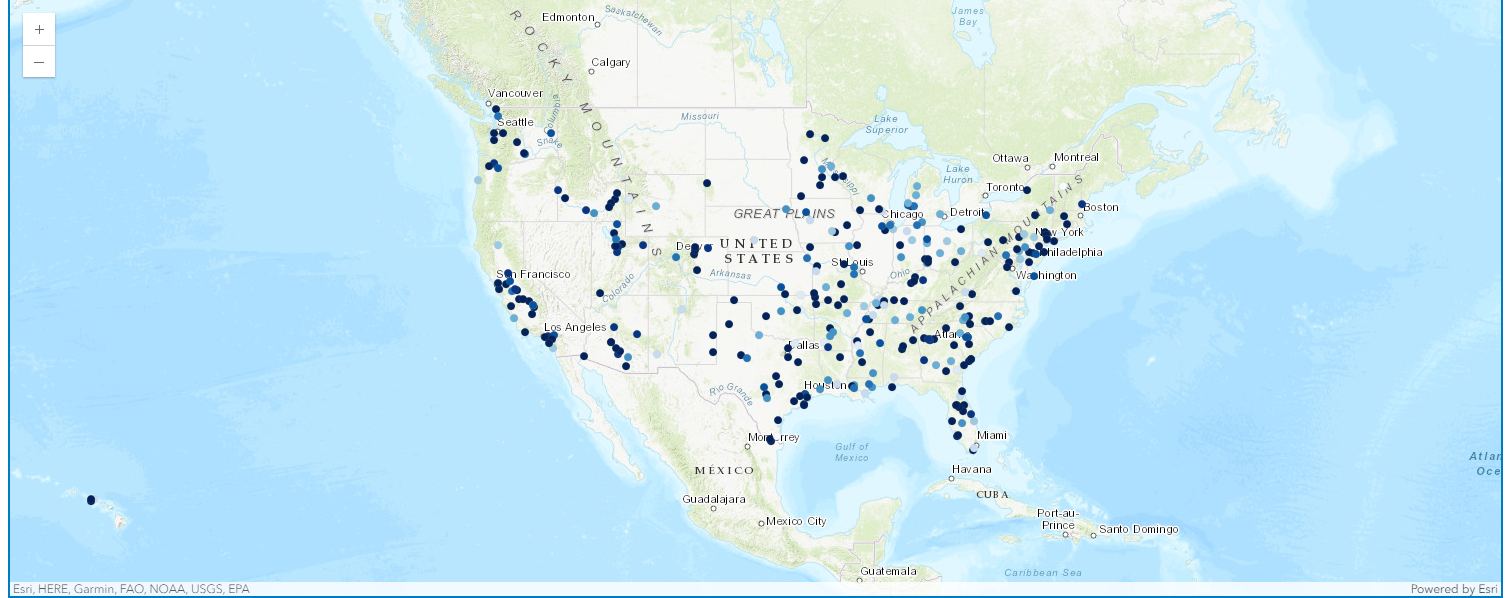

In [41]:
df.spatial.plot(map_widget=m4)

True

In [43]:
rend_manager = m4.content.renderer(0)
smm = rend_manager.smart_mapping()
smm.class_breaks_renderer(
    break_type="color",
    field="POPULATION",
    num_classes=20,
    classification_method="natural-breaks",
)

### Visualizing line features using simple symbols
Let us search for USA freeway layer and visualize it by looping through the different line symbols

In [50]:
search_result = gis.content.search(
    "title:USA Freeway System AND owner:esri_dm", item_type="Feature Layer"
)
freeway_item = search_result[0]
freeway_item

<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>

In [51]:
freeway_sdf = freeway_item.layers[0].query().sdf
freeway_sdf.head()

,OBJECTID,ROUTE_NUM,CLASS,NUMBER,SUFFIX,DIST_MILES,DIST_KM,SHAPE
0,1,CG8,C,G8,,5.12996,8.25588,"{""paths"": [[[-121.892261711658, 37.32391610061..."
1,2,I105,I,105,,19.83041,31.91401,"{""paths"": [[[-118.368428716304, 33.93055610296..."
2,3,I205,I,205,,48.25566,77.66011,"{""paths"": [[[-122.561879717577, 45.54969107336..."
3,4,I215,I,215,,93.43523,150.36972,"{""paths"": [[[-117.319118714291, 34.14458511089..."
4,5,I238,I,238,,2.03548,3.27579,"{""paths"": [[[-122.137358724846, 37.69015308551..."


In [ ]:
m8 = gis.map("USA")
m8

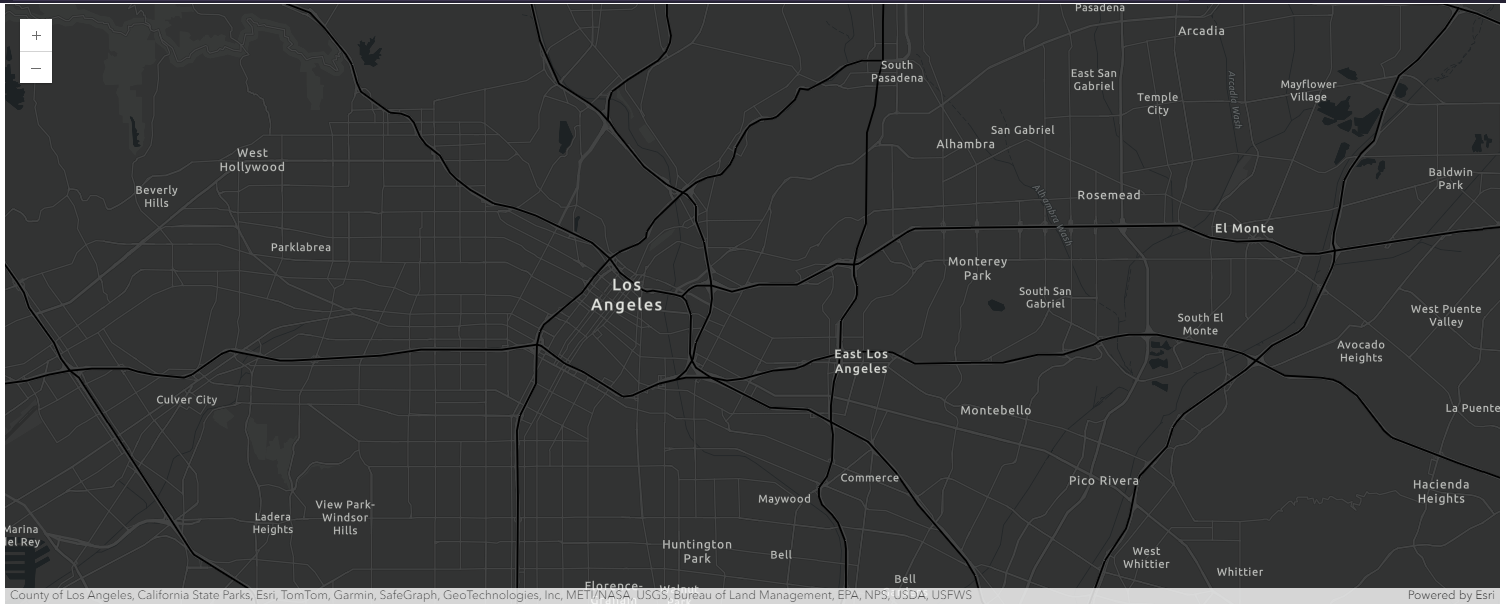

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_lines_animated_1.gif)

In [54]:
m8.center = [34.05, -118.2]
m8.zoom = 12
m8.basemap.basemap = "dark-gray-vector"

In [55]:
freeway_sdf.spatial.plot(
    map_widget=m8,
)

True

### Visualizing area features using different symbols

In [56]:
from arcgis.features import FeatureLayer

fl = FeatureLayer(
    "https://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2"
)
county_sdf = fl.query("STATE_NAME='Washington'", out_sr=4326).sdf
county_sdf.head()

,Shape_Length,Shape_Area,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP2007,...,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS97,AVG_SIZE97,CROP_ACR97,AVG_SALE97,SQMI,SHAPE
0,3.879553,0.590994,2953,Adams,Washington,53,001,53001,16428,17555,...,5773,544,3576,1653,628.0,1746.0,808651.0,321.45,1930.0,"{""rings"": [[[-119.36961802215399, 46.737285024..."
1,2.127905,0.193369,2954,Asotin,Washington,53,003,53003,20551,21237,...,9111,747,5612,2752,140.0,2175.0,87282.0,69.59,640.6,"{""rings"": [[[-117.48006100031489, 46.085736986..."
2,3.259149,0.531696,2955,Benton,Washington,53,005,53005,142475,164259,...,55963,3097,36344,16522,1078.0,568.0,440291.0,278.79,1760.0,"{""rings"": [[[-119.87687899986594, 46.562399986..."
3,6.259164,0.932106,2956,Chelan,Washington,53,007,53007,66616,71939,...,30407,5386,16178,8843,1113.0,111.0,41046.0,131.54,2993.7,"{""rings"": [[[-121.17981297788657, 47.896832976..."
4,5.62703,0.551224,2957,Clallam,Washington,53,009,53009,64525,70908,...,30683,3519,19757,7407,292.0,72.0,12116.0,20.58,1764.3,"{""rings"": [[[-124.73315299891175, 48.163761012..."


In [ ]:
m9 = gis.map("Seattle, WA")
m9.basemap.basemap = "gray-vector"
m9

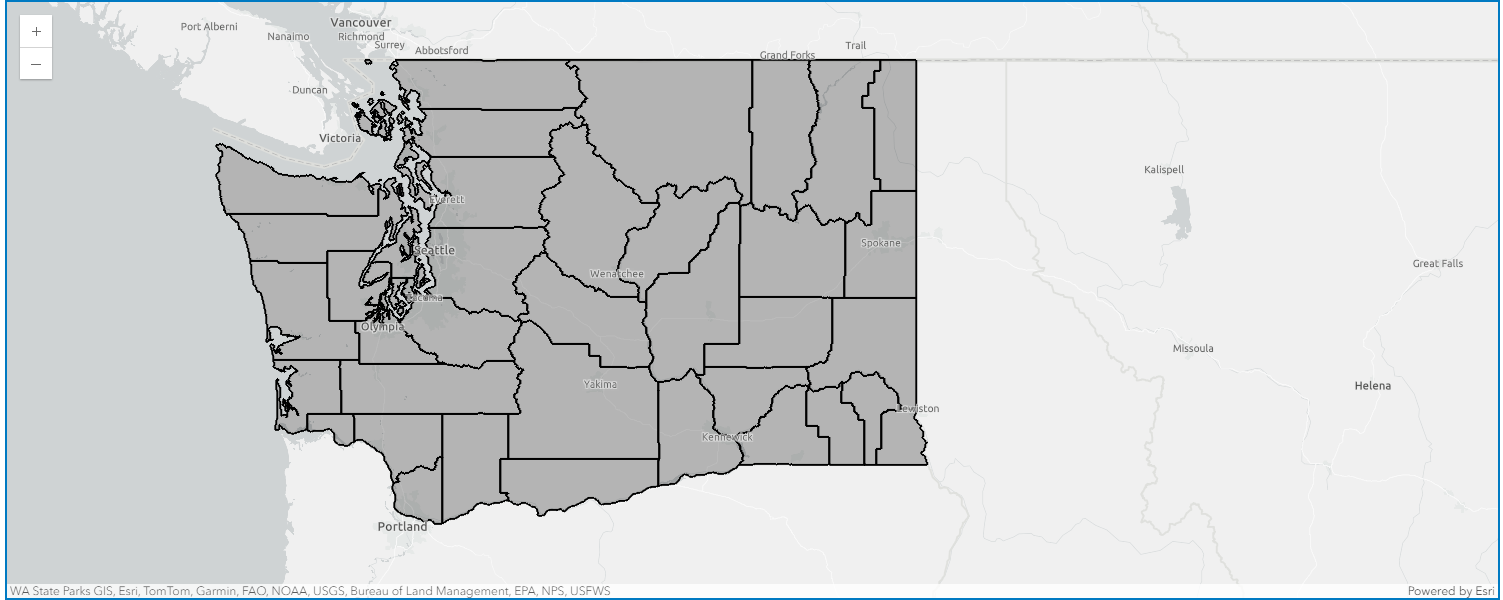

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_animate_polygons_1.gif)

In [58]:
county_sdf.spatial.plot(map_widget=m9)

True

**Conclusion**


The `Spatially Enabled DataFrame` gives you powerful visualization capabilities that allows you to plot your data on the interactive map widget. You specify colors and symbols using the same syntax that you would specify for a normal Pandas or a matplotlib plot.